## Creating an ANN using Pytorch

In [1]:
import pandas as pd
import torch

In [2]:
dataset = pd.read_csv('diabetes.csv')
print(dataset.shape)

(768, 9)


In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Pre-Processing of dataset

In [4]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
X = dataset.drop('Outcome', axis = 1).values ## independent features
y = dataset['Outcome'].values ## dependent features

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
### Libraries from Pytorch
import torch
import torch.nn as nn   ## Helps you to create and train the neural networks
import torch.nn.functional as F  ## this functional F contains functions like sigmoid, relu etc...

In [8]:
### Creating Tensors

## Remember that your independent features need to be converted into Float Tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

## No need to convert to float tensors in case of dependent features
y_train = torch.LongTensor(y_train)  ## LongTensor won't convert values into float tensors
y_test = torch.LongTensor(y_test)

In [9]:
### Creating model with pytorch

class ANN_Model(nn.Module):
    def __init__(self, input_features = 8, hidden1 = 20, hidden2 = 20, out_features = 2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features, hidden1)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
    def forward(self, x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x

In [10]:
## Instantiate ANN_MODEL

torch.manual_seed(20) ##it will set the seed of the random number generator to a fixed value, so that when you call for example torch.rand(2), the results will be reproducible
model = ANN_Model()

In [11]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [12]:
model.parameters() ## it's an generator, so we can iterate and retirve all the parameter one by one

<generator object Module.parameters at 0x0000024DFD155D68>

In [13]:
## Backward Propagation | Define the Loss Function | Define the Optimizer

loss_function = nn.CrossEntropyLoss() ## for multiclassification problem use CrossEntropyLoss function
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [48]:
epochs = 500
final_loss = []
for i in range(epochs):
    i = i + 1
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)
    
    ## after eveery 10 epochs print this
    if i % 10 == 1:
        print('Epoch number: {} and the loss: {}'.format(i, loss.item()))
        
    optimizer.zero_grad() ## Clears the gradients of all optimized class
    loss.backward() ## for backward propagation and to find the derivative
    optimizer.step() ## performs a single optimization step.

Epoch number: 1 and the loss: 0.35801443457603455
Epoch number: 11 and the loss: 0.35801443457603455
Epoch number: 21 and the loss: 0.35801443457603455
Epoch number: 31 and the loss: 0.35801443457603455
Epoch number: 41 and the loss: 0.35801443457603455
Epoch number: 51 and the loss: 0.35801443457603455
Epoch number: 61 and the loss: 0.35801443457603455
Epoch number: 71 and the loss: 0.35801443457603455
Epoch number: 81 and the loss: 0.35801443457603455
Epoch number: 91 and the loss: 0.35801443457603455
Epoch number: 101 and the loss: 0.35801443457603455
Epoch number: 111 and the loss: 0.35801443457603455
Epoch number: 121 and the loss: 0.35801443457603455
Epoch number: 131 and the loss: 0.35801443457603455
Epoch number: 141 and the loss: 0.35801443457603455
Epoch number: 151 and the loss: 0.35801443457603455
Epoch number: 161 and the loss: 0.35801443457603455
Epoch number: 171 and the loss: 0.35801443457603455
Epoch number: 181 and the loss: 0.35801443457603455
Epoch number: 191 and t

In [49]:
## Plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Epoch')

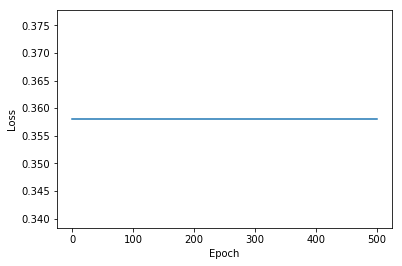

In [50]:
## To see the if loss is decreasing or not
plt.plot(range(epochs), final_loss)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [51]:
## Let's find out the prediction

## Prediction in X_test data
prediction = []  

## To remove this gradient --> (grad_fn=<AddBackward0>). it is required when we are taining the model. here it has no use.
with torch.no_grad():
    for i, data in enumerate(X_test):
#         print(model(data)) ## Here model is out ANN_Model
        y_pred = model(data)
        prediction.append(y_pred.argmax().item())
#         print(y_pred.argmax().item())  ## 1 = Diabetic Person     0 = No Diabetic Person

In [52]:
## list of prediction. ## 1 = Diabetic Person     0 = No Diabetic Person
prediction

[1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0]

## Accuracy

In [53]:
## Check the accuracy by using confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction)
cm

# result: 90+32 = 122 are true predicted values and 15+17 = 32 are wrong predicted values

array([[90, 17],
       [15, 32]], dtype=int64)

Text(51.0, 0.5, 'Predicted Values')

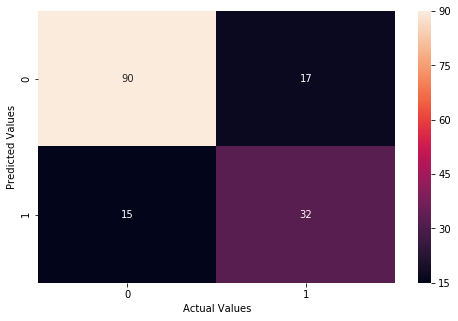

In [54]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot = True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [55]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, prediction)

In [56]:
acc_score ## Accuracy is 79%

0.7922077922077922

In [57]:
## Save the model
torch.save(model, 'diabetes.pt') ## pt is extension for pytorch files

## How to use existing model for the prediction of new dataset

In [58]:
## To load the model
model = torch.load('diabetes.pt')

In [59]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [60]:
## how to do prediction of the new data points

## Let's take the only first column of dataset and change it's values for prediction
dataset.iloc[0, :-1].head()

Pregnancies        6.0
Glucose          148.0
BloodPressure     72.0
SkinThickness     35.0
Insulin            0.0
Name: 0, dtype: float64

In [61]:
list(dataset.iloc[0, :-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [62]:
## New data
lst = [6.0, 130.0, 72.0, 40.0, 0.0, 33.6, 0.627, 45.0]

In [63]:
new_data = torch.tensor(lst) ## Converting into torch tensors.
new_data

tensor([  6.0000, 130.0000,  72.0000,  40.0000,   0.0000,  33.6000,   0.6270,
         45.0000])

In [64]:
new_data

tensor([  6.0000, 130.0000,  72.0000,  40.0000,   0.0000,  33.6000,   0.6270,
         45.0000])

In [65]:
## Predict new_data using PyTorch

## since this is just a single list, we don't have to use enumeraet
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax())
    print(model(new_data).argmax().item())  
    
## result = 1. which means for this data point(single list that we provided) person is diabetic.

tensor([0.9824, 1.4717])
tensor(1)
1
